# Electric Motor - Rotor Temperature Estimation

# Step 1. Read the data

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('pmsm_temperature_data.csv')

In [4]:
df.head()

ambient   coolant       u_d       u_q  motor_speed    torque       i_d  \
0 -0.752143 -1.118446  0.327935 -1.297858    -1.222428 -0.250182  1.029572   
1 -0.771263 -1.117021  0.329665 -1.297686    -1.222429 -0.249133  1.029509   
2 -0.782892 -1.116681  0.332771 -1.301822    -1.222428 -0.249431  1.029448   
3 -0.780935 -1.116764  0.333700 -1.301852    -1.222430 -0.248636  1.032845   
4 -0.774043 -1.116775  0.335206 -1.303118    -1.222429 -0.248701  1.031807   

        i_q        pm  stator_yoke  stator_tooth  stator_winding  profile_id  
0 -0.245860 -2.522071    -1.831422     -2.066143       -2.018033           4  
1 -0.245832 -2.522418    -1.830969     -2.064859       -2.017631           4  
2 -0.245818 -2.522673    -1.830400     -2.064073       -2.017343           4  
3 -0.246955 -2.521639    -1.830333     -2.063137       -2.017632           4  
4 -0.246610 -2.521900    -1.830498     -2.062795       -2.018145           4

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998070 entries, 0 to 998069
Data columns (total 13 columns):
ambient           998070 non-null float64
coolant           998070 non-null float64
u_d               998070 non-null float64
u_q               998070 non-null float64
motor_speed       998070 non-null float64
torque            998070 non-null float64
i_d               998070 non-null float64
i_q               998070 non-null float64
pm                998070 non-null float64
stator_yoke       998070 non-null float64
stator_tooth      998070 non-null float64
stator_winding    998070 non-null float64
profile_id        998070 non-null int64
dtypes: float64(12), int64(1)
memory usage: 99.0 MB


In [6]:
df.profile_id.unique().shape

(52,)

In [7]:
df.isna().sum()

ambient           0
coolant           0
u_d               0
u_q               0
motor_speed       0
torque            0
i_d               0
i_q               0
pm                0
stator_yoke       0
stator_tooth      0
stator_winding    0
profile_id        0
dtype: int64

# Step 2. Understand the data - Data Visualization 

Visualize correlation between variables

In [79]:
import matplotlib

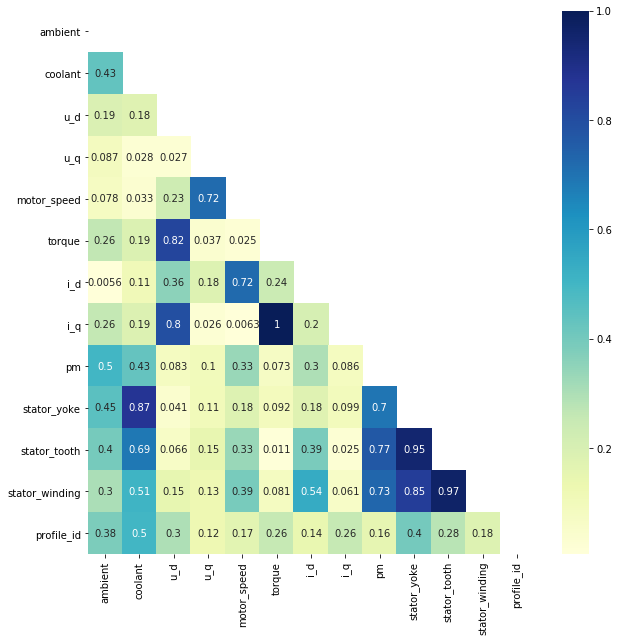

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
corr = df.corr().abs()
plt.figure(figsize=(10, 10))
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, annot=True, cmap="YlGnBu")

In [9]:
df.corr()['pm']

ambient           0.501496
coolant           0.430548
u_d              -0.082564
u_q               0.101236
motor_speed       0.332419
torque           -0.072905
i_d              -0.299227
i_q              -0.086486
pm                1.000000
stator_yoke       0.695014
stator_tooth      0.768352
stator_winding    0.729561
profile_id        0.156735
Name: pm, dtype: float64

Analyse the measurement sessions

In [6]:
df1=df.groupby(['profile_id']).size().sort_values(ascending=True).rename('measures').reset_index()
df1

profile_id  measures
0           47      2175
1           46      2179
2           52      3725
3           64      6249
4           51      6260
5           59      7474
6           11      7886
7           43      8442
8           78      8444
9           54     10806
10          55     10806
11          50     10809
12          49     10815
13          67     11134
14          75     13471
15          57     14402
16          61     14515
17          60     14542
18          77     14621
19          71     14655
20          10     15255
21          72     15300
22          69     15349
23          31     15586
24          63     16667
25          41     16699
26          73     16785
27          42     16919
28          45     17141
29          81     17671
30          32     20959
31          29     21357
32          48     21982
33          76     22187
34          36     22608
35          68     23330
36          74     23760
37          80     23823
38          30     23862
39          62     25599
40          70     25676
41          44     26340
42          79     31153
43          53     32441
44          56     33122
45          58     33381
46           4     33423
47          27     35360
48          66     36475
49          65     40093
50           6     40387
51          20     43970

In [46]:
df2=df.groupby(['profile_id'])

In [36]:
df2.head()

ambient   coolant       u_d       u_q  motor_speed    torque  \
0      -0.752143 -1.118446  0.327935 -1.297858    -1.222428 -0.250182   
1      -0.771263 -1.117021  0.329665 -1.297686    -1.222429 -0.249133   
2      -0.782892 -1.116681  0.332771 -1.301822    -1.222428 -0.249431   
3      -0.780935 -1.116764  0.333700 -1.301852    -1.222430 -0.248636   
4      -0.774043 -1.116775  0.335206 -1.303118    -1.222429 -0.248701   
33423  -0.991042 -1.133823  0.292156 -1.232613    -1.222408  0.264467   
33424  -0.978566 -1.133186  0.290646 -1.230301    -1.222414  0.284976   
33425  -0.970031 -1.132799  0.289612 -1.228698    -1.222416  0.298665   
33426  -0.963348 -1.132242  0.288855 -1.227444    -1.222418  0.309255   
33427  -0.959676 -1.131814  0.288298 -1.226614    -1.222423  0.315951   
73810  -2.749857 -1.062121  0.332536 -1.276879    -1.222431 -0.243307   
73811  -2.749857 -1.063101  0.333189 -1.279757    -1.222427 -0.243990   
73812  -2.749857 -1.063240  0.331893 -1.275739    -1.222429 -0.243168   
73813  -2.749857 -1.063951  0.332184 -1.275931    -1.222434 -0.243421   
73814  -2.749857 -1.064603  0.333302 -1.278150    -1.222428 -0.243996   
89065  -1.004377 -1.121654  0.323488 -1.299336    -1.222430 -0.239430   
89066  -1.003756 -1.121233  0.323055 -1.300406    -1.222429 -0.239603   
89067  -1.003189 -1.121282  0.323732 -1.298816    -1.222431 -0.239101   
89068  -1.003351 -1.121051  0.323116 -1.300885    -1.222432 -0.239626   
89069  -1.002573 -1.120491  0.323869 -1.298650    -1.222430 -0.238890   
96951  -1.908649 -1.079592  0.323421 -1.294816    -1.222432 -0.242639   
96952  -1.945673 -1.079477  0.318830 -1.293665    -1.222432 -0.240214   
96953  -1.946597 -1.079167  0.319580 -1.297363    -1.222431 -0.239513   
96954  -1.947213 -1.077655  0.321388 -1.295731    -1.222431 -0.238094   
96955  -1.952527 -1.075799  0.321497 -1.298276    -1.222431 -0.237660   
140921 -1.573522 -1.079855  0.318418 -1.261970    -1.222432 -0.249481   
140922 -1.570727 -1.078587  0.319041 -1.261180    -1.222431 -0.248954   
140923 -1.569534 -1.077925  0.319451 -1.259965    -1.222432 -0.248479   
140924 -1.565308 -1.078293  0.320205 -1.258326    -1.222429 -0.247686   
140925 -1.564357 -1.079536  0.319786 -1.259166    -1.222429 -0.247844   
...          ...       ...       ...       ...          ...       ...   
887058  0.256966 -0.702134  0.348241 -1.254406    -1.218569 -0.254793   
887059  0.267588 -0.701390  0.323521 -1.218865    -1.206626 -0.066069   
887060  0.271589 -0.700529  0.270781 -1.122024    -1.160766  0.134612   
887061  0.271783 -0.700125  0.201106 -0.981741    -1.089554  0.270715   
887062  0.277945 -0.699895  0.122966 -0.807864    -1.000185  0.353668   
901679  0.119159 -1.061824  0.339764 -1.315502    -1.221897 -0.255499   
901680  0.120362 -1.062440  0.335346 -1.282827    -1.206919 -0.322386   
901681  0.121106 -1.063901  0.343010 -1.181668    -1.158081 -0.375287   
901682  0.119567 -1.065368  0.359423 -1.030862    -1.084740 -0.414683   
901683  0.116617 -1.066627  0.384063 -0.844376    -0.993825 -0.445735   
910123 -0.395889 -0.745004  0.309723 -1.254493    -1.222131 -0.255481   
910124 -0.400168 -0.744249  0.289828 -1.214875    -1.207187 -0.021036   
910125 -0.396108 -0.742709  0.190442 -1.135806    -1.158549  0.565930   
910126 -0.391694 -0.741395  0.068413 -1.061346    -1.100764  1.085251   
910127 -0.381406 -0.740259 -0.022310 -1.007606    -1.058045  1.465298   
941276 -1.018733 -0.750284  0.351943 -1.256054    -1.215117 -0.254137   
941277 -1.014490 -0.750216  0.353647 -1.253017    -1.201745 -0.489067   
941278 -1.011448 -0.750739  0.414887 -1.208375    -1.153775 -0.929776   
941279 -1.009269 -0.751886  0.514595 -1.117399    -1.080917 -1.241902   
941280 -1.007707 -0.753885  0.637883 -0.990900    -0.990369 -1.450455   
965099 -0.818707 -0.796358  0.326717 -1.322431    -1.222318 -0.255577   
965100 -0.819892 -0.797344  0.325247 -1.276214    -1.208150 -0.264885   
965101 -0.818891 -0.798277  0.322671 -1.165228    -1.160226 -0.2716

In [7]:
ordered_ids = df1.profile_id.values.tolist()
ordered_ids

[47,
 46,
 52,
 64,
 51,
 59,
 11,
 43,
 78,
 54,
 55,
 50,
 49,
 67,
 75,
 57,
 61,
 60,
 77,
 71,
 10,
 72,
 69,
 31,
 63,
 41,
 73,
 42,
 45,
 81,
 32,
 29,
 48,
 76,
 36,
 68,
 74,
 80,
 30,
 62,
 70,
 44,
 79,
 53,
 56,
 58,
 4,
 27,
 66,
 65,
 6,
 20]

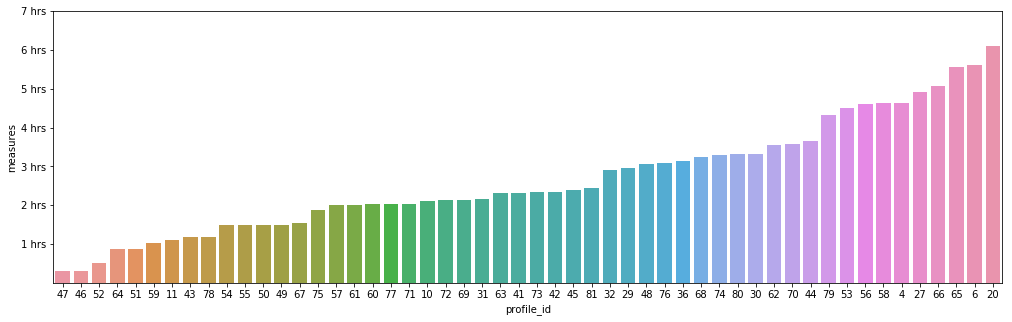

In [8]:
plt.figure(figsize=(17, 5))
sns.barplot(y ='measures', x='profile_id', data=df1, order=ordered_ids)
tcks = plt.yticks(2*3600*np.arange(1, 8), [f'{a} hrs' for a in range(1, 8)]) 

Understand relationship between the variables, with the target pm

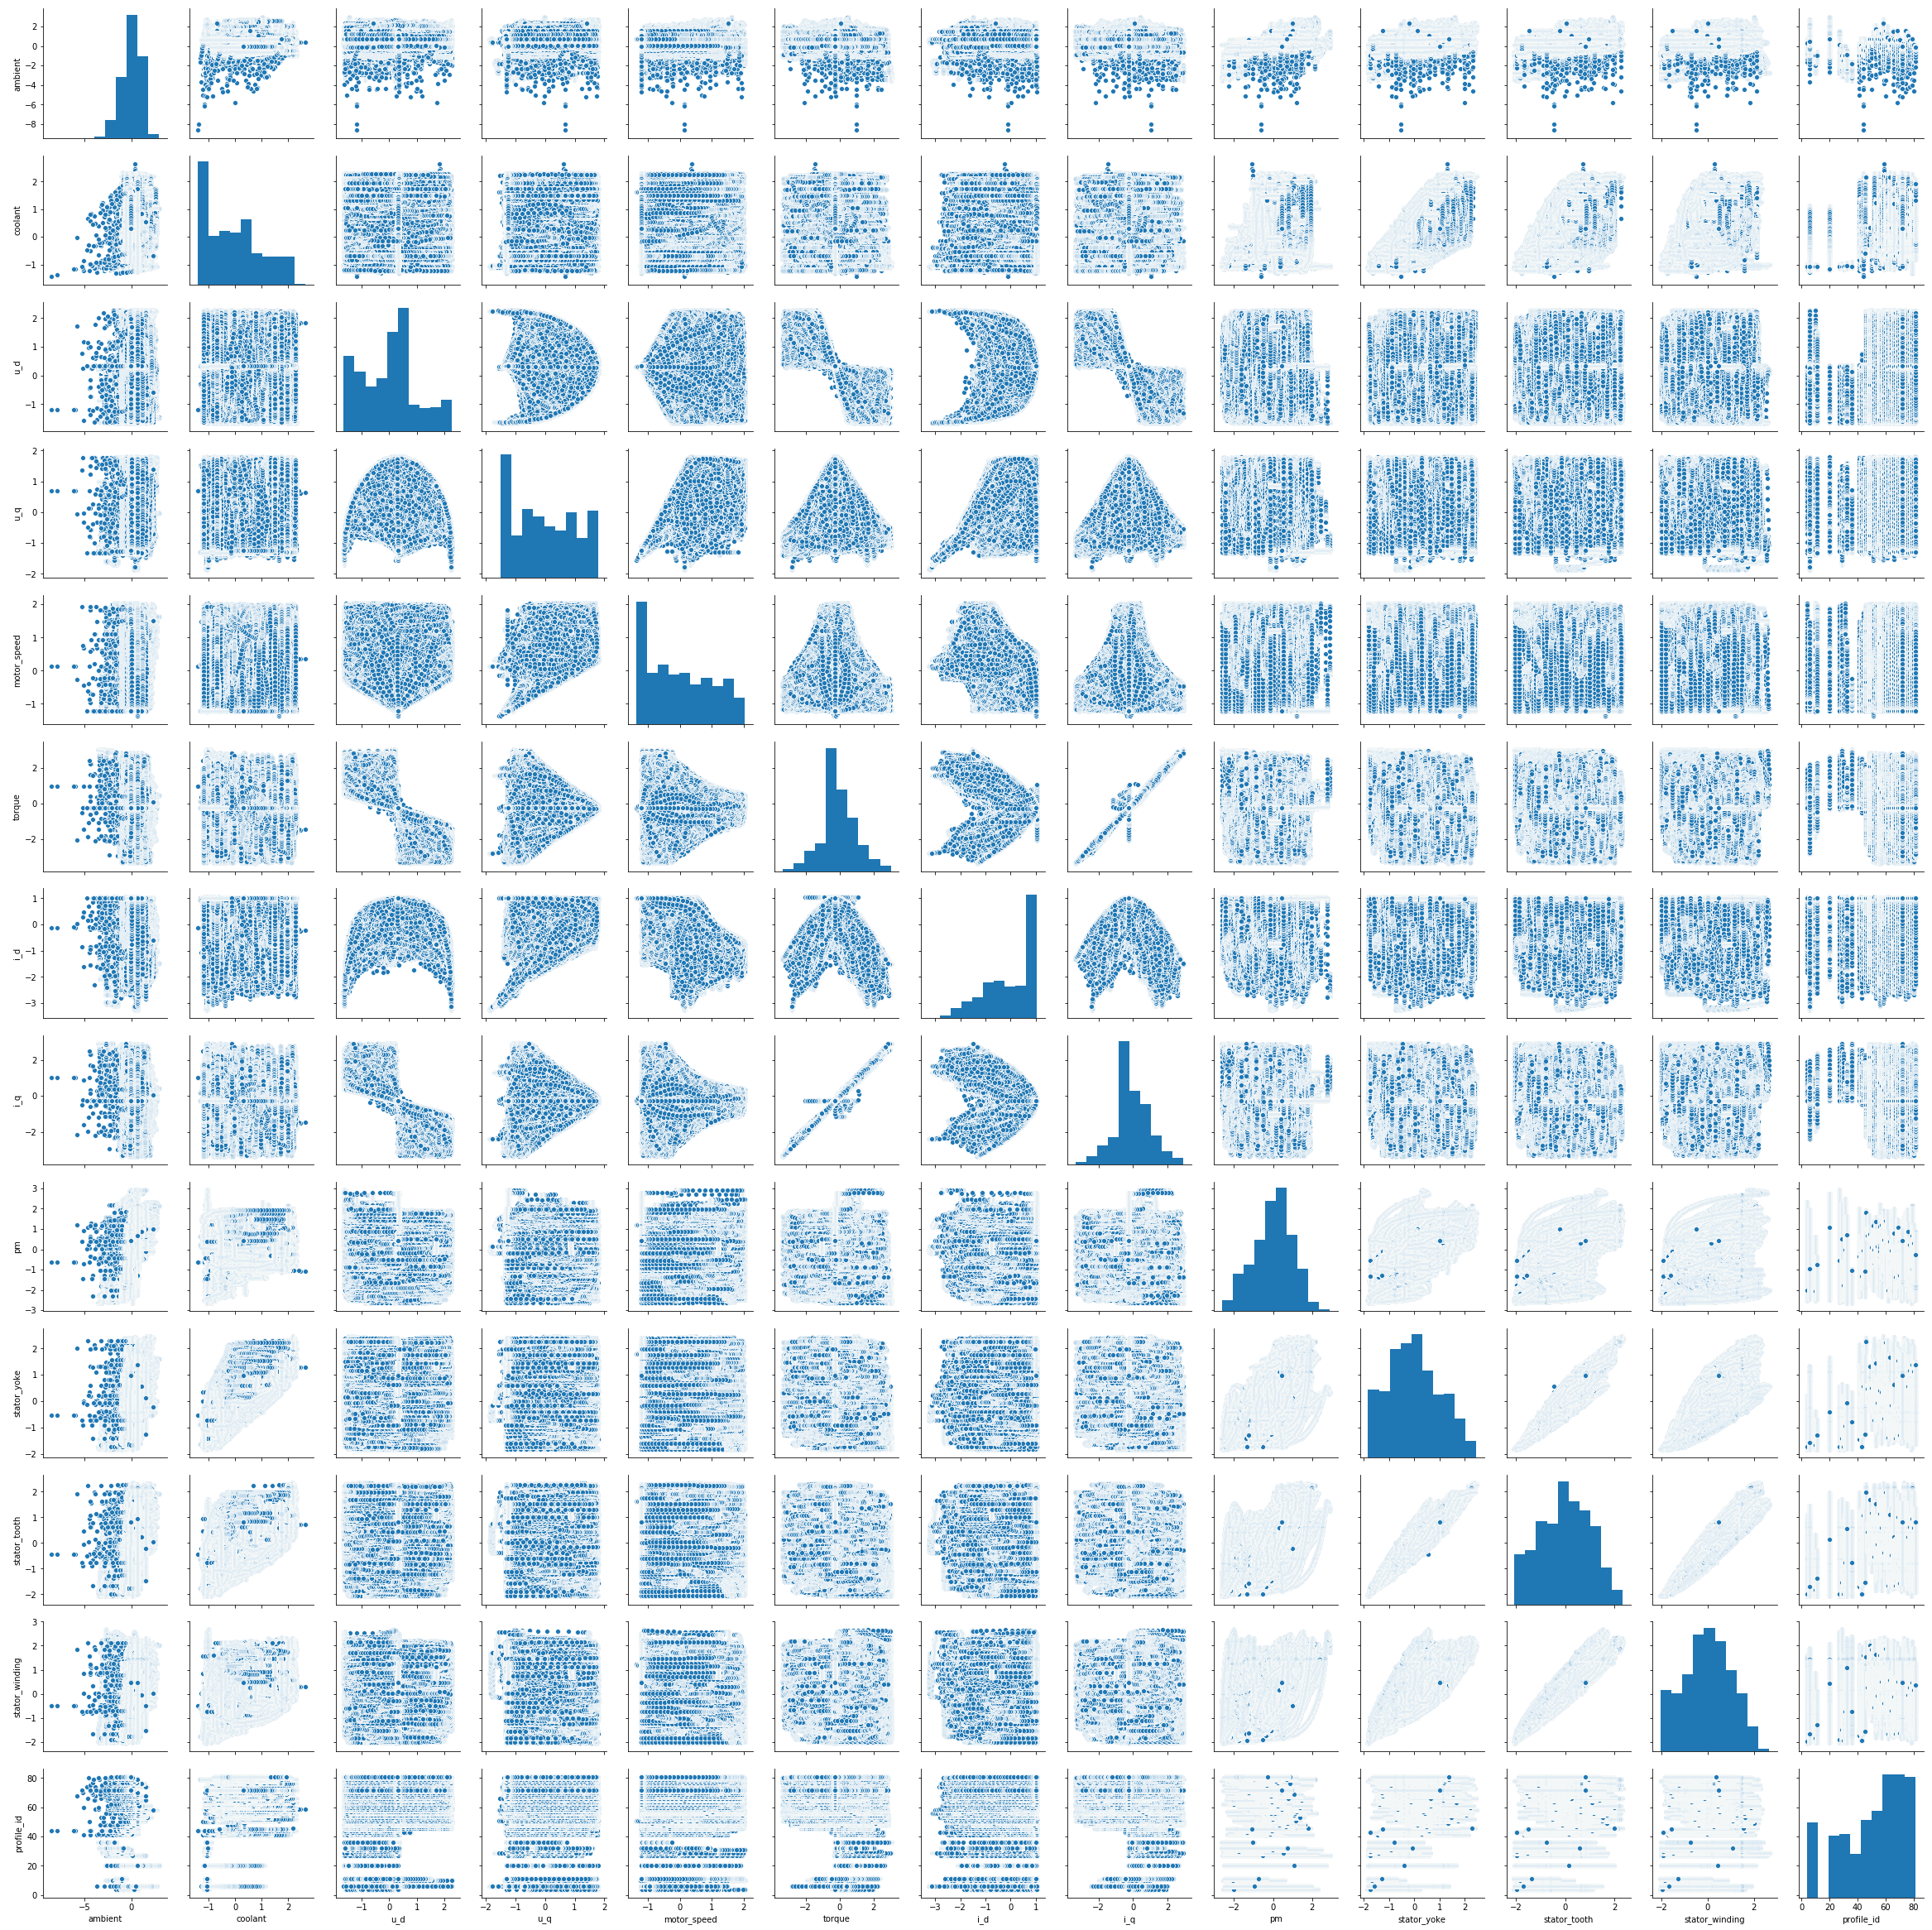

In [40]:
sns.pairplot(df)

In [47]:
grpd = df2
_df = grpd.size().sort_values().rename('samples').reset_index()

In [63]:
ids_to_plot = [63, 65, 43, 53, 4]
for i, (sess_id, _df) in enumerate([g for g in grpd if g[0] in ids_to_plot]):
    print(i) 
    print(sess_id)
    print(_df.reset_index(drop=True).head())
    break

0
4
    ambient   coolant       u_d       u_q  motor_speed    torque       i_d  \
0 -0.752143 -1.118446  0.327935 -1.297858    -1.222428 -0.250182  1.029572   
1 -0.771263 -1.117021  0.329665 -1.297686    -1.222429 -0.249133  1.029509   
2 -0.782892 -1.116681  0.332771 -1.301822    -1.222428 -0.249431  1.029448   
3 -0.780935 -1.116764  0.333700 -1.301852    -1.222430 -0.248636  1.032845   
4 -0.774043 -1.116775  0.335206 -1.303118    -1.222429 -0.248701  1.031807   

        i_q        pm  stator_yoke  stator_tooth  stator_winding  profile_id  
0 -0.245860 -2.522071    -1.831422     -2.066143       -2.018033           4  
1 -0.245832 -2.522418    -1.830969     -2.064859       -2.017631           4  
2 -0.245818 -2.522673    -1.830400     -2.064073       -2.017343           4  
3 -0.246955 -2.521639    -1.830333     -2.063137       -2.017632           4  
4 -0.246610 -2.521900    -1.830498     -2.062795       -2.018145           4  


In [75]:
int(200000> 4*3600)

1

In [77]:
for i, g in enumerate(grpd):
    print(i)
    print("profile id ", g[0])
    _df = g[1]
    k = int(len(_df)> 4*3600) + 1
    print("k", k)
    print(_df['coolant'].index.values)
    print(_df['coolant'].index.values[::k*3600])
    break

0
profile id  4
2
[    0     1     2 ... 33420 33421 33422]
[    0  7200 14400 21600 28800]


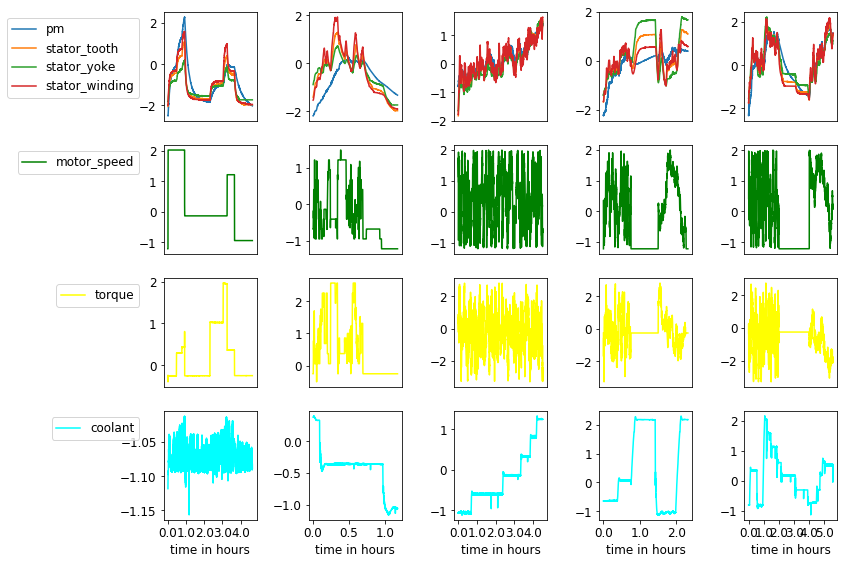

In [84]:
target_features = ['pm', 'stator_tooth', 'stator_yoke', 'stator_winding']
matplotlib.rcParams.update({'font.size': 12})
ids_to_plot = [63, 65, 43, 53, 4]
fig2 = plt.figure(figsize=(12, 8))
cols = len(ids_to_plot)
for i, (sess_id, _df) in enumerate([g for g in grpd if g[0] in ids_to_plot]):
    _df = _df.reset_index(drop=True)
    plt.subplot(4, cols, i+1)
    plt.xticks([])
    for target in target_features:
        plt.plot(_df[target], label=target)
    if i == 0:
        plt.legend(loc='upper right', bbox_to_anchor=(-0.2, 1.0))
    plt.subplot(4, cols, i+1+cols)
    plt.plot(_df['motor_speed'], color='green', label='motor_speed')
    plt.xticks([])
    if i == 0:
        plt.legend(loc='upper right', bbox_to_anchor=(-0.2, 1.0))
    plt.subplot(4, cols, i+1+cols*2)
    plt.plot(_df['torque'], color='yellow', label='torque')
    plt.xticks([])
    if i == 0:
        plt.legend(loc='upper right', bbox_to_anchor=(-0.2, 1.0))
    plt.subplot(4, cols, i+1+cols*3)
    plt.plot(_df['coolant'], color='cyan', label='coolant')
    k = int(len(_df)> 4*3600) + 1
    plt.xticks(_df['coolant'].index.values[::k*3600], _df.coolant.index.values[::k*3600] / (2*3600))
    plt.xlabel('time in hours')
    if i == 0:
        plt.legend(loc='upper right', bbox_to_anchor=(-0.2, 1.0))
    
plt.tight_layout()

# Step 3. Prepare the model 

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X=df.drop('pm', axis=1)
y=df.pm

In [12]:
X1=df.drop(['pm','i_d','i_q','u_d','u_q'], axis=1)
y1=df.pm

In [13]:
X2=df.drop(['pm','i_d','i_q','u_d','u_q','torque'], axis=1)
y2=df.pm

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [82]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size=0.3,random_state=42)

In [97]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size=0.3,random_state=42)

In [72]:
y_train.dtypes

dtype('float64')

In [15]:
X_train.shape

(798456, 12)

In [25]:
y_train_df = pd.DataFrame(y_train)

# Step 4. Build/Test Supervised ML models 

Linear Regression Model

In [84]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)
y_pred=model.predict(X_test)

In [86]:
model2=LinearRegression().fit(X1_train,y1_train)
y_pred2=model2.predict(X1_test)

In [98]:
model3=LinearRegression().fit(X2_train,y2_train)
y_pred3=model3.predict(X2_test)

In [87]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7741692181970522

In [88]:
r2_score(y1_test, y_pred2)

0.7417046892309083

In [99]:
r2_score(y2_test, y_pred3)

0.7415905516045094

In [89]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test, y_pred)
mse

0.22406335496505625

In [90]:
mse1=mean_squared_error(y1_test, y_pred2)
mse1

0.25581605710689376

In [91]:
import math
print(math.sqrt(mse))
print(math.sqrt(mse1))

0.47335330881388826
0.5057826184309755


In this case the error is comprised between 0.47 and 0.5, depending on the variables used to predict the target. 
error is the difference between the observed value of the target and the value the model predicted 

Try with Decision Tree

In [17]:
from sklearn.tree import DecisionTreeRegressor

In [18]:
dt=DecisionTreeRegressor(max_leaf_nodes=3, random_state=0)
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)

In [19]:
r2_score(y_test,y_pred)

0.4869898025942244

In [20]:
mse=mean_squared_error(y_test, y_pred)
print(math.sqrt(mse))

0.7134390015338822


Random Forest

In [92]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
rf=RandomForestRegressor(max_depth=4,random_state=0,n_estimators=50)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [93]:
rf=RandomForestRegressor(max_depth=4,random_state=0,n_estimators=20)
rf.fit(X1_train,y1_train)
y_pred2=rf.predict(X1_test)

In [100]:
rf=RandomForestRegressor(max_depth=4,random_state=0,n_estimators=20)
rf.fit(X2_train,y2_train)
y_pred3=rf.predict(X2_test)

In [23]:
r2_score(y_test,y_pred)

0.6781876534499962

In [94]:
r2_score(y1_test,y_pred2)

0.6811062885223

In [101]:
r2_score(y2_test,y_pred3)

0.680308479295433

In [24]:
mse=mean_squared_error(y_test, y_pred)
print(math.sqrt(mse))

0.5650608250896135


In [95]:
mse1=mean_squared_error(y1_test, y_pred2)
print(math.sqrt(mse1))

0.5619900378388175


# Step 5. Improve the model with Feature engineering

In [112]:
spans = [6360, 3360, 1320, 9480] 
#values correspond to low pass filters to cut-off high frequencies
max_span=max(spans)
p_df = df.drop(['pm','profile_id'], axis=1).reset_index(drop=True)
#drop features we do not want to calculate the EWMA
prepadding = pd.DataFrame(np.zeros((max_span, len(p_df.columns))), columns=p_df.columns)
#prepad with first values repeated until max span
#calculate EWMA to smooth out the fluctuations
prepadded_df = pd.concat([prepadding, p_df], axis=0, ignore_index=True)
ewma = pd.concat([prepadded_df.ewm(span=s).mean().rename(columns=lambda c: f'{c}_ewma_{s}') for s in spans], axis=1).astype(np.float32)
ewma = ewma.iloc[max_span:, :].reset_index(drop=True) 
#remove prepadding
enriched_df = pd.concat([p_df, ewma, df.profile_id, df.pm], axis=1)
enriched_df =enriched_df.dropna()
enriched_df
#get enriched data

ambient   coolant       u_d       u_q  motor_speed    torque  \
0      -0.752143 -1.118446  0.327935 -1.297858    -1.222428 -0.250182   
1      -0.771263 -1.117021  0.329665 -1.297686    -1.222429 -0.249133   
2      -0.782892 -1.116681  0.332771 -1.301822    -1.222428 -0.249431   
3      -0.780935 -1.116764  0.333700 -1.301852    -1.222430 -0.248636   
4      -0.774043 -1.116775  0.335206 -1.303118    -1.222429 -0.248701   
5      -0.762936 -1.116955  0.334901 -1.303017    -1.222429 -0.248197   
6      -0.749228 -1.116170  0.335014 -1.302082    -1.222430 -0.247914   
7      -0.738450 -1.113986  0.336256 -1.305155    -1.222432 -0.248321   
8      -0.730910 -1.111828  0.334905 -1.303790    -1.222432 -0.247785   
9      -0.727130 -1.109486  0.335988 -1.305633    -1.222431 -0.248294   
10     -0.723713 -1.108284  0.335400 -1.304560    -1.222428 -0.247913   
11     -0.717754 -1.108588  0.334431 -1.304337    -1.222429 -0.247721   
12     -0.704877 -1.109986  0.336241 -1.305820    -1.222434 -0.248002   
13     -0.682534 -1.111362  0.335566 -1.303240    -1.222430 -0.247513   
14     -0.654583 -1.112600  0.336557 -1.306217    -1.222430 -0.248067   
15     -0.630711 -1.113657  0.335352 -1.305559    -1.222430 -0.247591   
16     -0.620099 -1.114285  0.335909 -1.305675    -1.222430 -0.247884   
17     -0.614858 -1.114598  0.336290 -1.306618    -1.222433 -0.247910   
18     -0.607448 -1.115023  0.333016 -1.234402    -1.190867 -0.307437   
19     -0.603737 -1.115890  0.324559 -0.983049    -1.076152 -0.348240   
20     -0.603234 -1.115034  0.316031 -0.636913    -0.915227 -0.376261   
21     -0.600459 -1.111927  0.308402 -0.266279    -0.740405 -0.399789   
22     -0.598305 -1.109613  0.304178  0.091858    -0.567463 -0.377051   
23     -0.599766 -1.109079  0.299402  0.475354    -0.377378 -0.384299   
24     -0.603717 -1.108268  0.296587  0.874742    -0.174446 -0.404643   
25     -0.603569 -1.107398  0.296128  1.174401    -0.011280 -0.367824   
26     -0.602564 -1.105411  0.290501  1.346797     0.105584 -0.337966   
27     -0.598031 -1.102991  0.278853  1.466556     0.215570 -0.373613   
28     -0.596117 -1.101440  0.266134  1.549545     0.364731 -0.396387   
29     -0.592720 -1.100034  0.261106  1.608851     0.528152 -0.365004   
...          ...       ...       ...       ...          ...       ...   
998040 -0.036774  1.054458  0.330574 -1.248092    -1.222430 -0.255640   
998041 -0.035599  1.077155  0.330869 -1.248811    -1.222429 -0.255640   
998042 -0.039809  1.098848  0.330864 -1.247413    -1.222427 -0.255640   
998043 -0.044464  1.120441  0.330845 -1.247659    -1.222428 -0.255640   
998044 -0.049484  1.138296  0.330721 -1.247070    -1.222433 -0.255640   
998045 -0.051278  1.153379  0.330771 -1.247937    -1.222432 -0.255640   
998046 -0.047538  1.167665  0.331112 -1.247650    -1.222429 -0.255640   
998047 -0.051823  1.181391  0.331084 -1.247251    -1.222433 -0.255640   
998048 -0.050580  1.194705  0.331623 -1.247736    -1.222430 -0.255640   
998049 -0.049689  1.203870  0.331863 -1.246625    -1.222436 -0.255640   
998050 -0.049051  1.209165  0.332239 -1.247406    -1.222426 -0.255640   
998051 -0.048016  1.208166  0.332050 -1.246098    -1.222431 -0.255640   
998052 -0.045430  1.186550  0.332334 -1.248317    -1.222433 -0.255640   
998053 -0.043737  1.150395  0.331321 -1.246100    -1.222425 -0.255640   
998054 -0.044050  1.101153  0.331515 -1.248962    -1.222432 -0.255640   
998055 -0.050501  1.038358  0.331304 -1.246039    -1.222428 -0.255640   
998056 -0.050557  0.966232  0.331577 -1.248829    -1.222434 -0.255640   
998057 -0.053503  0.879300  0.330900 -1.245607    -1.222430 -0.255640   
998058 -0.054021  0.790375  0.331394 -1.248668    -1.222436 -0.255640   
998059 -0.051878  0.702182  0.331194 -1.245829    -1.222428 -0.255640   
998060 -0.050781  0.615396  0.331615 -1.249884    -1.222435 -0.255640   
998061 -0.050319  0.537794  0.331493 -1.248210    -1.222433 -0.255640   
998062 -0.055087  0.472326  0.331570 -1.251317    -1.222430 -0.2556

In [113]:
from sklearn.preprocessing import StandardScaler

In [114]:
scaler = StandardScaler()
enriched_df = pd.DataFrame(scaler.fit_transform(enriched_df), columns=enriched_df.columns)
#normalize

C:\Users\anast\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype float32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\anast\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype float32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Step 6. Improved Linear Regression Model

In [116]:
X4=enriched_df.drop('pm', axis=1)
y4=enriched_df.pm

In [125]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4,y4, test_size=0.2,random_state=42)

In [127]:
model4 = LinearRegression().fit(X4_train, y4_train)
y_pred4=model4.predict(X4_test)

In [128]:
r2_score(y4_test, y_pred4)

0.9276019596842231

In [129]:
mse4=mean_squared_error(y4_test, y_pred4)
mse4

0.07245526079709372

In [130]:
print(math.sqrt(mse4))

0.2691751489218381


the error range decreased, the difference between the measured value of pm and the predicted value is 0.2691. 
ex: for a pm measured value of -2,5220, model predicts the value will be comprised between -2,7911 and -2,2529, in the conditions given for the dependent variables 